In [1]:
# Import packages
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import matplotlib.pyplot as plt

In [185]:
# Import data from csv file
data = pd.read_csv("../machine_learning/siren_data_train.csv", sep=",")
print(f"Data size: {data.memory_usage().sum() / 1e6:.2f} MB")
print("The first 10 rows in the data:")
data.head(10)

Data size: 0.59 MB
The first 10 rows in the data:


,near_fid,near_x,near_y,near_angle,heard,building,xcoor,ycoor,noise,in_vehicle,asleep,no_windows,age
0,2712,1.998301e+06,9.011692e+06,-171.588672,1,0,1999193.0,9011824,0,0,0,0,59
1,2721,1.928907e+06,8.954624e+06,-51.208102,1,0,1928298.0,8955382,0,0,0,0,29
2,297,2.026384e+06,8.256164e+06,39.018754,1,0,2025706.0,8255615,0,0,0,0,32
3,739,1.743184e+06,8.052652e+06,15.046022,1,0,1742935.0,8052585,0,0,0,0,36
4,1852,1.350375e+06,7.909850e+06,144.603170,1,0,1350807.0,7909543,0,0,0,0,55
5,2737,1.934971e+06,8.959613e+06,-159.477621,0,1,1938739.0,8961023,0,0,0,1,62
6,3692,1.327964e+06,7.940968e+06,18.712045,1,1,1327733.0,7940890,0,0,0,0,74
7,404,2.005312e+06,8.234592e+06,146.602179,1,0,2007113.0,8233405,0,0,0,0,24
8,133,2.010260e+06,8.244737e+06,91.888991,1,0,2010284.0,8244010,0,0,0,0,66
9,2003,1.339570e+06,7.892866e+06,160.654726,1,1,1340898.0,7892400,0,0,0,0,53


In [186]:
print("Overview of Numeric Variables")
numeric_columns = [col for col in data.columns]
data[numeric_columns].describe()

Overview of Numeric Variables


,near_fid,near_x,near_y,near_angle,heard,building,xcoor,ycoor,noise,in_vehicle,asleep,no_windows,age
count,5710.000000,5.710000e+03,5.710000e+03,5710.000000,5710.000000,5710.000000,5.710000e+03,5.710000e+03,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,1888.705954,1.797385e+06,8.283496e+06,1.751993,0.760070,0.248687,1.796497e+06,8.283723e+06,0.190893,0.094046,0.006130,0.023643,50.635902
std,1320.046217,2.783430e+05,5.363099e+05,106.216736,0.427078,0.432290,2.789790e+05,5.369782e+05,0.393039,0.291918,0.078058,0.151947,18.630865
min,1.000000,1.244070e+06,7.430582e+06,-179.786267,0.000000,0.000000,1.244893e+06,7.432236e+06,0.000000,0.000000,0.000000,0.000000,18.000000
25%,538.000000,1.535191e+06,7.919606e+06,-90.278514,1.000000,0.000000,1.529848e+06,7.919276e+06,0.000000,0.000000,0.000000,0.000000,35.000000
50%,1901.000000,1.895376e+06,8.251327e+06,2.313685,1.000000,0.000000,1.891302e+06,8.251345e+06,0.000000,0.000000,0.000000,0.000000,50.000000
75%,2821.000000,2.003408e+06,8.368423e+06,95.330994,1.000000,0.000000,2.003743e+06,8.368852e+06,0.000000,0.000000,0.000000,0.000000,66.000000
max,4150.000000,2.686771e+06,1.040622e+07,179.992043,1.000000,1.000000,2.686256e+06,1.042743e+07,1.000000,1.000000,1.000000,1.000000,88.000000


In [187]:
# Calculate the distance to nearest horn

list_loc_horn = []
list_loc_person = []
list_distance_to_horn = []

x_cor_horn = data["near_x"]
y_cor_horn = data["near_y"]

x_cor_person = data["xcoor"]
y_cor_person = data["ycoor"]

for row in range(len(x_cor_horn)):
    loc_horn = [x_cor_horn[row], y_cor_horn[row]]
    list_loc_horn.append(loc_horn)

    loc_person = [x_cor_person[row], y_cor_person[row]]
    list_loc_person.append(loc_person)

for i in range(len(x_cor_horn)):
    
    coordinate_horn = list_loc_horn[i] 
    coordinate_person = list_loc_person[i]
    distance_to_horn = math.dist(coordinate_horn,coordinate_person)
    list_distance_to_horn.append(distance_to_horn)
   
data["distance to nearest horn"] = list_distance_to_horn
print("The first 10 rows in the data (distance to nearest horn included):")
data.head(10)


The first 10 rows in the data (distance to nearest horn included):


,near_fid,near_x,near_y,near_angle,heard,building,xcoor,ycoor,noise,in_vehicle,asleep,no_windows,age,distance to nearest horn
0,2712,1.998301e+06,9.011692e+06,-171.588672,1,0,1999193.0,9011824,0,0,0,0,59,901.283517
1,2721,1.928907e+06,8.954624e+06,-51.208102,1,0,1928298.0,8955382,0,0,0,0,29,972.006260
2,297,2.026384e+06,8.256164e+06,39.018754,1,0,2025706.0,8255615,0,0,0,0,32,872.340924
3,739,1.743184e+06,8.052652e+06,15.046022,1,0,1742935.0,8052585,0,0,0,0,36,257.804449
4,1852,1.350375e+06,7.909850e+06,144.603170,1,0,1350807.0,7909543,0,0,0,0,55,529.686791
5,2737,1.934971e+06,8.959613e+06,-159.477621,0,1,1938739.0,8961023,0,0,0,1,62,4023.130333
6,3692,1.327964e+06,7.940968e+06,18.712045,1,1,1327733.0,7940890,0,0,0,0,74,244.293455
7,404,2.005312e+06,8.234592e+06,146.602179,1,0,2007113.0,8233405,0,0,0,0,24,2157.250580
8,133,2.010260e+06,8.244737e+06,91.888991,1,0,2010284.0,8244010,0,0,0,0,66,727.512654
9,2003,1.339570e+06,7.892866e+06,160.654726,1,1,1340898.0,7892400,0,0,0,0,53,1407.236379


Scatter plot of data, where the color bar represents the number of times a certain value of Y is repeated.


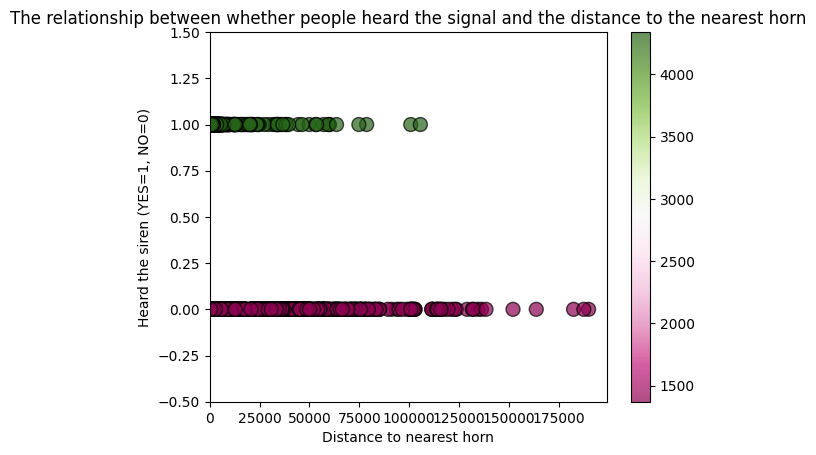

In [188]:
# Create scatter plot which represents the relationship between whether people heard the signal and the distance to the nearest horn

list_heard = []
heard = data["heard"]
for row in range(len(x_cor_horn)):
    heard_yes_or_no = heard[row]
    list_heard.append(heard_yes_or_no)
  
x = list_distance_to_horn
y = list_heard

# compute the entry counts
u,c = np.unique(y, return_counts=True)

# color according to the counts
color = [c[np.where(u==y[i])][0] for i in range(len(y))]
print("Scatter plot of data, where the color bar represents the number of times a certain value of Y is repeated.")
plt.title("The relationship between whether people heard the signal and the distance to the nearest horn")
plt.scatter(x, y, s=100, c=color, cmap='PiYG', marker='o', edgecolors='black', linewidth=1, alpha=0.7)
plt.axis((0, 199000, -0.5, 1.5)) #(xmin, xmsx, ymin, ymax)
plt.colorbar()
plt.ylabel('Heard the siren (YES=1, NO=0)')
plt.xlabel('Distance to nearest horn')
plt.show()

Scatter plot of data, where the color bar represents the number of times a certain value of Y is repeated.


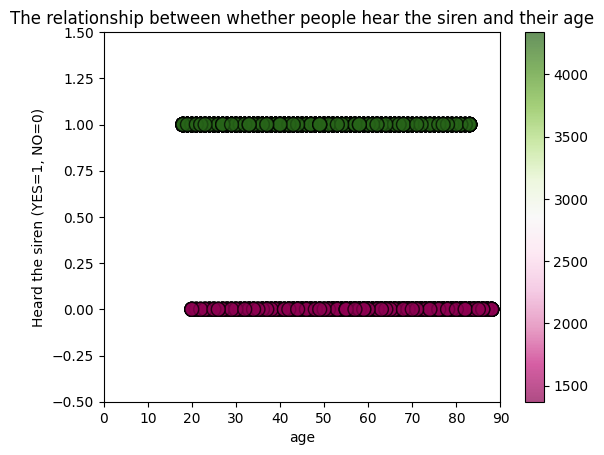

In [189]:
# Create scatter plot that represents the relationship between whether people hear the siren and their age

list_age = []
age = data["age"]
for row in range(len(x_cor_horn)):
    age_value = age[row]
    list_age.append(age_value)

x = list_age
y = list_heard

# compute the entry counts
u,c = np.unique(y, return_counts=True)

# color according to the counts
color = [c[np.where(u==y[i])][0] for i in range(len(y))]
print("Scatter plot of data, where the color bar represents the number of times a certain value of Y is repeated.")
plt.title("The relationship between whether people hear the siren and their age")
plt.scatter(x, y, s=100, c=color, cmap='PiYG', marker='o', edgecolors='black', linewidth=1, alpha=0.7)
plt.axis((0, 90, -0.5, 1.5)) #(xmin, xmsx, ymin, ymax)
plt.colorbar()
plt.ylabel('Heard the siren (YES=1, NO=0)')
plt.xlabel('age')
plt.show()

Scatter plot of data, where the color bar represents the number of times a certain value of Y is repeated.


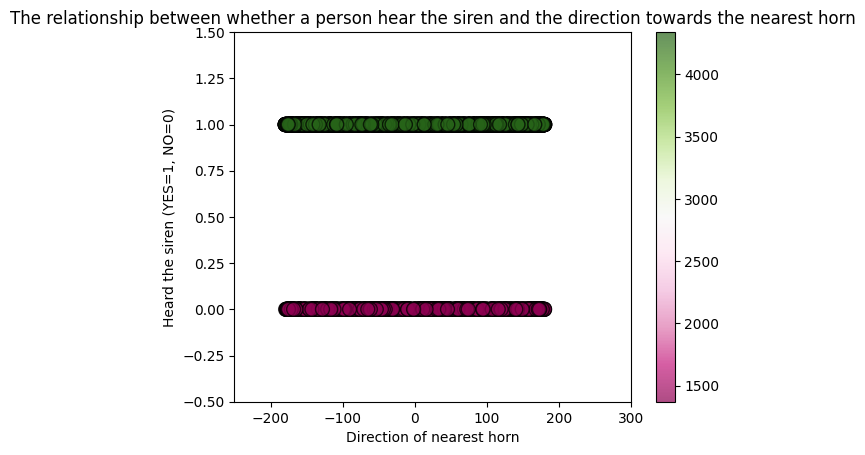

In [190]:
# Create scatter plot thet represent the relationship between whether a person hear the siren and the direction towards the nearest horn

list_near_angle = []
agnle  = data["near_angle"]
for row in range(len(x_cor_horn)):
    near_agle_value = agnle[row]
    list_near_angle.append(near_agle_value)

x = list_near_angle
y = list_heard

# compute the entry counts
u,c = np.unique(y, return_counts=True)

# color according to the counts
color = [c[np.where(u==y[i])][0] for i in range(len(y))]
print("Scatter plot of data, where the color bar represents the number of times a certain value of Y is repeated.")
plt.title("The relationship between whether a person hear the siren and the direction towards the nearest horn")
plt.scatter(x, y, s=100, c=color, cmap='PiYG', marker='o', edgecolors='black', linewidth=1, alpha=0.7)
plt.axis((-250, 300, -0.5, 1.5)) #(xmin, xmsx, ymin, ymax)
plt.colorbar()
plt.ylabel('Heard the siren (YES=1, NO=0)')
plt.xlabel('Direction of nearest horn')
plt.show()